In [1]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import joblib

path = os.listdir('D:/brain/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1,'meningioma_tumor':2,'glioma_tumor':3}

X = []
Y = []
for cls in classes:
    pth = 'D:/brain/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])
        
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

# Normalize pixel values to [0, 1]
xtrain = xtrain / 255
xtest = xtest / 255

# Perform PCA
pca = PCA(n_components=0.98)
pca.fit(xtrain)

# Transform data using PCA
pca_train = pca.transform(xtrain)
pca_test = pca.transform(xtest)

# Train SVM classifier
sv = SVC(kernel='rbf', C=100, gamma=0.0001)
sv.fit(pca_train, ytrain)


SVC(C=100, gamma=0.0001)

In [1]:
import cv2
import numpy as np
import joblib
pca = joblib.load('pca.joblib')
model = joblib.load('brain_joblib.joblib')

# Load the image to predict
img_path = 'D:/brain/Training/pituitary_tumor/one.jpg'
img = cv2.imread(img_path, 0)
img = cv2.resize(img, (200, 200))

# Flatten the image into a 1D array
x = img.reshape(1, -1)

# Normalize the pixel values to [0, 1]
x = x / 255

# Apply PCA transformation to the image
#pca = PCA(n_components=0.98)
#pca.fit(xtrain)

x_pca = pca.transform(x)

# Make a prediction using the trained SVC model
prediction = model.predict(x_pca)

# Map the predicted label to the class name
classes = {0: 'no_tumor', 1: 'pituitary_tumor', 2: 'meningioma_tumor', 3: 'glioma_tumor'}
predicted_class = classes[prediction[0]]

print("The predicted class is:", predicted_class)


The predicted class is: pituitary_tumor


In [4]:
import joblib

# Perform PCA and fit the model
pca = PCA(n_components=0.98)
pca.fit(xtrain)

# Save the fitted PCA model to a file
joblib.dump(pca, 'pca.joblib')

['pca.joblib']

In [13]:
joblib.dump(sv, 'brain_joblib.joblib')

['brain_joblib.joblib']

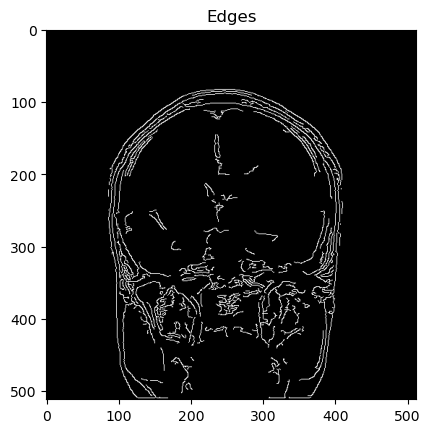

In [83]:
img = cv2.imread(img_path, 0)

# Detect edges using Canny edge detection
edges = cv2.Canny(img, 100, 200)
cv2.imwrite('edges.jpg', edges)

# Plot the image with edges detected
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.show()

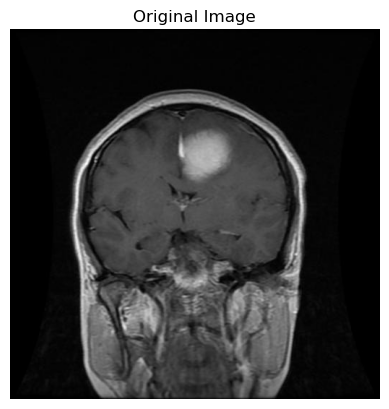

In [81]:
img = cv2.imread(img_path)

# Show the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

In [67]:
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage

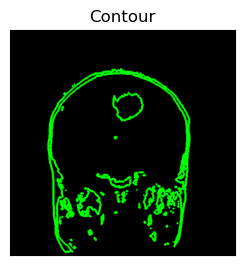

In [79]:

img = cv2.imread(img_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image
contour_img = np.zeros_like(img)


# Draw the contours on the blank image
contra = cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 3)

cv2.imwrite('contra.jpg', contra)

plt.subplot(1, 2, 2), plt.imshow(contour_img, cmap='gray')
plt.title('Contour'), plt.xticks([]), plt.yticks([])

plt.show()









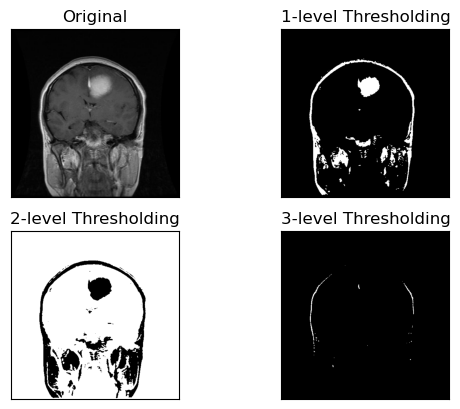

In [55]:
import matplotlib.pyplot as plt

# Load the image
img_path = 'D:/brain/Training/meningioma_tumor/m (20).jpg'
img = cv2.imread(img_path, 0)

# 1-level thresholding
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite('thresh1.jpg', thresh1)

# 2-level thresholding
ret1, thresh2 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
ret2, thresh2 = cv2.threshold(thresh2, 200, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite('thresh2.jpg', thresh2)

# 3-level thresholding
ret1, thresh3 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
ret2, thresh3 = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
ret3, thresh3 = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
cv2.imwrite('thresh3.jpg', thresh3)

# Display the images
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2), plt.imshow(thresh1, cmap='gray')
plt.title('1-level Thresholding'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3), plt.imshow(thresh2, cmap='gray')
plt.title('2-level Thresholding'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4), plt.imshow(thresh3, cmap='gray')
plt.title('3-level Thresholding'), plt.xticks([]), plt.yticks([])

plt.show()

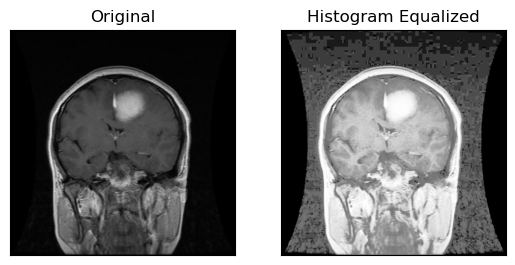

In [84]:
img = cv2.imread('D:/brain/Training/meningioma_tumor/m (20).jpg', 0)

# Apply histogram equalization
equalized_img = cv2.equalizeHist(img)
cv2.imwrite('histogram.jpg', equalized_img)

# Display the images
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(equalized_img, cmap='gray')
plt.title('Histogram Equalized'), plt.xticks([]), plt.yticks([])

plt.show()